## 一、重要参数

### （一）找出最佳节点和最佳分支的方法：criterion

**1.导入需要的算法库和模块**

In [1]:
from sklearn import tree #决策树
from sklearn.datasets import load_wine #红酒数据集
from sklearn.model_selection import train_test_split #测试集训练集分裂

**2.探索数据**

In [2]:
wine = load_wine() #数据实例化

In [3]:
wine #字典

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.data #通过'.键'将数据取出

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target #标签（3类）

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.data.shape #178行，13个特征

(178, 13)

In [7]:
import pandas as pd
#将数据和标签转化成数据框，再用concat将两者连起来
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine.feature_names #特征的名字

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names #标签的名字

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

**3.分训练集和测试集**

In [10]:
#将数据分为训练集(70%)和测试集(30%),注意4个的顺序
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [11]:
Xtrain.shape #训练集的特征的结构

(124, 13)

In [12]:
Xtest.shape #测试集的特征的结构

(54, 13)

In [13]:
Ytrain #训练集的标签

array([2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2])

**4.建立模型**

entropy：信息熵（实际计算的是基于信息上的信息增益，即父节点的信息熵和子节点的信息熵之差）；gini：基尼系数（默认）。

In [14]:
#建模三部曲
clf = tree.DecisionTreeClassifier(criterion="entropy") #实例化（信息熵）
clf = clf.fit(Xtrain, Ytrain) #用训练集数据训练模型
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9259259259259259

**5.画一棵树**

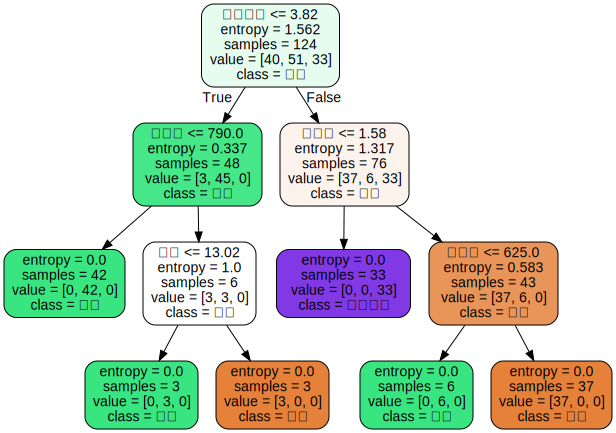

In [15]:
#画树
import graphviz
feature_name= ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf #训练的模型的名字
                                ,feature_names=feature_name #特征的名字
                                ,class_names=['琴酒','雪莉','贝尔摩德'] #标签的名字
                                ,filled=True #是否填充颜色，颜色越深不纯度越低，白色是绝对不纯
                                ,rounded=True #框形状是否圆
                               )
graph = graphviz.Source(dot_data)
graph

**6.探索决策树**

In [16]:
clf.feature_importances_ #每个特征的重要性，数越大重要性越高

array([0.03097821, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.38747599, 0.        , 0.        , 0.39949843,
       0.        , 0.        , 0.18204737])

In [17]:
[*zip(feature_name,clf.feature_importances_)] #根节点的重要性最高

[('酒精', 0.030978211321692803),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.38747598677154743),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.3994984288889819),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.18204737301777793)]

### （二）随机性：random_state & splitter

加入参数random_state使score固定，random_state等于的数没有实际意义。

In [18]:
#建模三部曲
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                 ) #实例化
clf = clf.fit(Xtrain, Ytrain) #用训练集数据训练模型
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9259259259259259

加入参数splitter="best"：优先选择更重要的特征进行分枝（重要性可通过feature\_importances\_查看）；<br>
加入参数splitter="random"：分枝时更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要的信息而降低对训练集的拟合。

In [19]:
#建模三部曲
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter='random'
                                 ) #实例化
clf = clf.fit(Xtrain, Ytrain) #用训练集数据训练模型
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9629629629629629

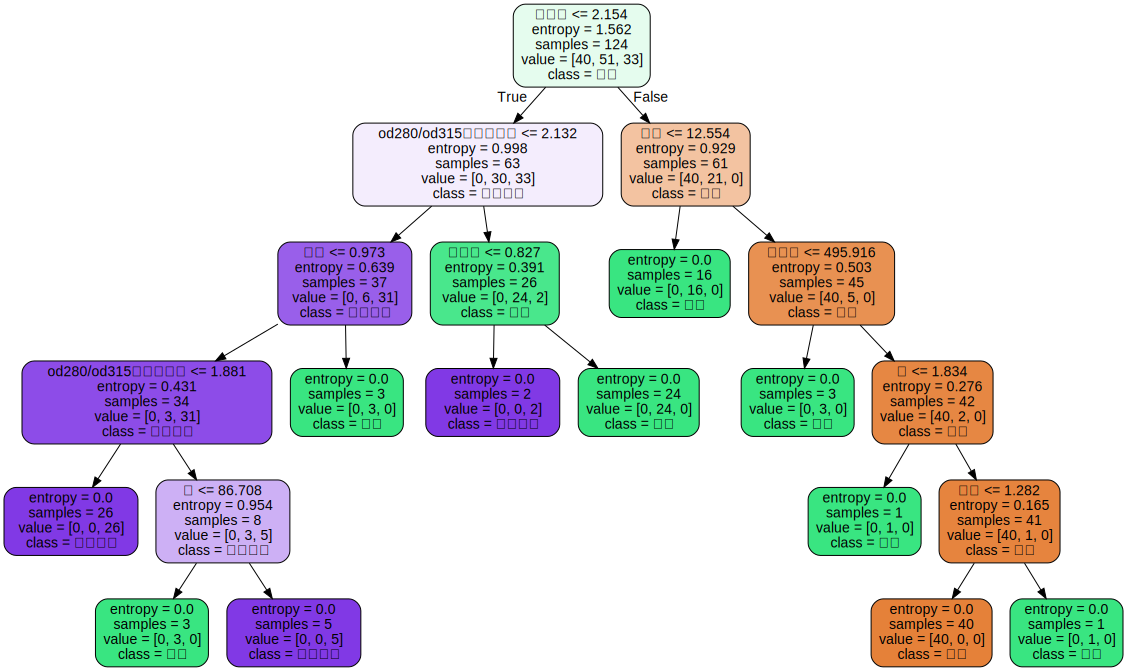

In [20]:
#画树，树变宽了，因为随机性增加了
import graphviz
feature_name= ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf #训练的模型的名字
                                ,feature_names=feature_name #特征的名字
                                ,class_names=['琴酒','雪莉','贝尔摩德'] #标签的名字
                                ,filled=True #是否填充颜色，颜色越深不纯度越低
                                ,rounded=True) #框形状是否圆
graph = graphviz.Source(dot_data)
graph

In [21]:
#查看训练集准确度，看是否过拟合。由于测试集与训练集准确度接近，不算过拟合
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

### （三）剪枝参数

加入与剪枝有关的参数，防止过拟合。

**1.max_depth：限制树的最大深度，在高维度低样本量时非常有效。**

**2.min_samples_leaf & min_samples_split**

min_samples_leaf：一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则：<br>
(1)分枝不会发生；<br>
(2)朝着满足每个子节点都包含至少min_samples_leaf个样本的方向分枝。<br>
一般搭配max_depth使用。<br>
输入浮点数作为样本量的百分比来使用。

min_samples_split：一个节点必须包含至少min_samples_split个训练样本，这个节点才被允许分枝。

In [22]:
#建模三部曲
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter='random'
                                  ,max_depth=3 #score不变，可保留
                                 # ,min_samples_leaf=10
                                 # ,min_samples_split=25
                                 ) #实例化
clf = clf.fit(Xtrain, Ytrain) #用训练集数据训练模型
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9444444444444444

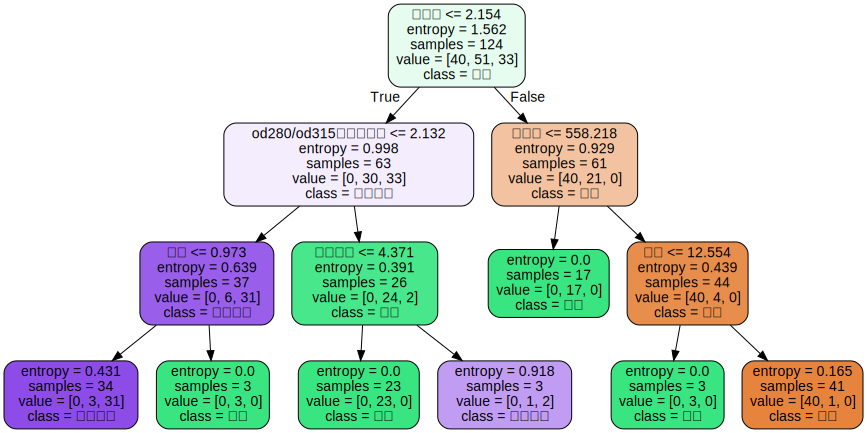

In [23]:
dot_data = tree.export_graphviz(clf #训练的模型的名字
                                ,feature_names=feature_name #特征的名字
                                ,class_names=['琴酒','雪莉','贝尔摩德'] #标签的名字
                                ,filled=True #是否填充颜色，颜色越深不纯度越低
                                ,rounded=True) #框形状是否圆
graph = graphviz.Source(dot_data)
graph

**3.max_features & min_impurity_decrease**

max_features：限制分枝时考虑的特征个数，比较暴力，建议使用PCA、ICA或特征选择模块中的降维算法。

min_impurity_decrease：限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

**使用超参数的学习曲线选择最优参数值**

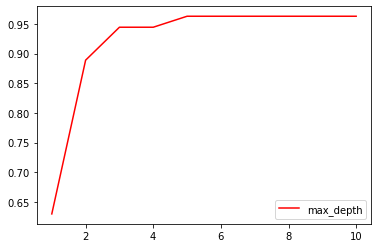

In [24]:
import matplotlib.pyplot as plt
test= []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1 #最大深度学习曲线，3和4最好
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain) #用训练集数据训练模型
    score = clf.score(Xtest, Ytest) #返回预测的准确度
    test.append(score)
plt.plot(range(1,11),test,color='red',label='max_depth')
plt.legend()
plt.show()

### （四）目标权重参数

**class_weight & min_weight_graction_leaf**

class_weight：完成样本标签平衡的参数。对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。

min_weight_graction_leaf：有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响，因此这时候剪枝，就需要搭配这个基于权重的剪枝参数来使用，它比不知道样本权重的标准（如min_samples_leaf）更少偏向主导类，能确保叶节点至少包含样本权重的总和的一小部分。

## 二、重要属性和接口

feature\_importances\_

fit

score

apply返回每个测试样本所在的叶子节点的索引。

In [25]:
clf.apply(Xtest)

array([19, 10,  4, 11, 19, 11,  4, 19, 19, 19, 19, 11,  4,  4, 19, 19, 11,
        4, 11, 11, 11, 19,  4,  7,  4, 11, 19,  4, 19, 13, 13,  4, 19, 19,
       19, 11,  4, 19, 13, 19,  8, 19, 13, 19, 19,  4,  4, 13, 19,  4, 11,
       13,  4, 13], dtype=int64)

predict返回每个测试样本的分类/回归结果。

In [26]:
clf.predict(Xtest)

array([0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 2, 1, 0, 2, 1, 1, 2, 1])